# A Predictive Tool for those Who Need Rental Assistance in Fulton County, GA

Some useful links: 

* [program details](https://www.fultoncountyga.gov/covid-19/rental-assistance)

* [additional program info](https://sharefulton.fultoncountyga.gov/stories/s/Emergency-Rental/22ag-mzc6)

* [dataset](https://sharefulton.fultoncountyga.gov/Health-Human-Services/Neighborly-ERA-Applications/std8-6vc9)


The Emergency Rent and Utility Assistance (ERA) program is a program throughout the united states that assists families that are in need of emergency assistance for rent and utilities resulting from the COVID-19 pandemic. Residents have to meet eligibility requirements by the federal government, including

* One or more individuals within the household has qualified for unemployment benefits or experienced a reduction in household income, incurred significant costs, or experienced other financial hardship due, directly or indirectly, to the COVID-19 outbreak;
* One or more individuals within the household can demonstrate a risk of experiencing homelessness or housing instability; and
* The household’s income is at or below 80% of the area median income.

Also, an initial exploration of the data shows that when the payment program pays out, it takes on average 100 days for the person to get the money. This is a long time to wait for someone who is struggling due to the pandemic!

With the above details in mind, this project aims to answer the question will I receive assistance from the ERA program? 

Below is a summary of the 77% and 78% accurate logistic regression and gradient boosting classifiers that is built for the ERA program applicants.

# Summary

I began this project with promise. On exploring the data, however, there appeared to be a number of oddities that diminished the chances of a reasonable classifier. Firstly, the documentation is very poor. There are columns which are unclear. For example, there is a column for funding total amount, total assistance approved, and ams amount (which is the amount of the check given) and they all can differ from one another. Additionally, the data analysis and the logistic regression predictor indicate those with a lower housing ami ratio (ratio of their rent to average locally) have a higher chance of receiving aid, somewhat counterintuitively. People with less money likely need more aid. My hypothesis that could explain this is that there are other data that are not included that are influencing the decision. For example, there is no data indicating a recent job loss. If one lost their job and had higher rent requirements, then perhaps they would likely be approved for aid. However, if someone still kept their job and had low rent requirements, perhaps this program is not applicable to them.

There are some insights that align nicely with reality. In the data analysis and in the logistic regression predictor, higher household size indicates a larger chance of receiving aid. Also, the program specifically mentions that this aid is for non-Atlanta residents in the Fulton county area (much of Fulton county contains atlanta), and the data and the logistic regression predictor both reflect this fact.

Also optimistically we find that the logistic regression coefficients are large in magnitude for much of the location data. On visualizing this with a heatmap, we find that the areas with the higher coefficients correspond to parts of the poorer regions of the area. 

All of this being said, the classifiers, logistic regression and gradient boosting trees, are 77% and 78% accurate respectively. However, I believe one should be careful in using classifiers that have oddities that contradict intuition, and these certainly leave something to be desired there. 

I had planned on making these classifiers available publicly through a flask application, as I think it would be extremely helpful to an applicant to have some prediction on whether they will receive aid. But unless some further observation is made on the oddities of the data, I hesitate to do so.

 ## Figures from this project

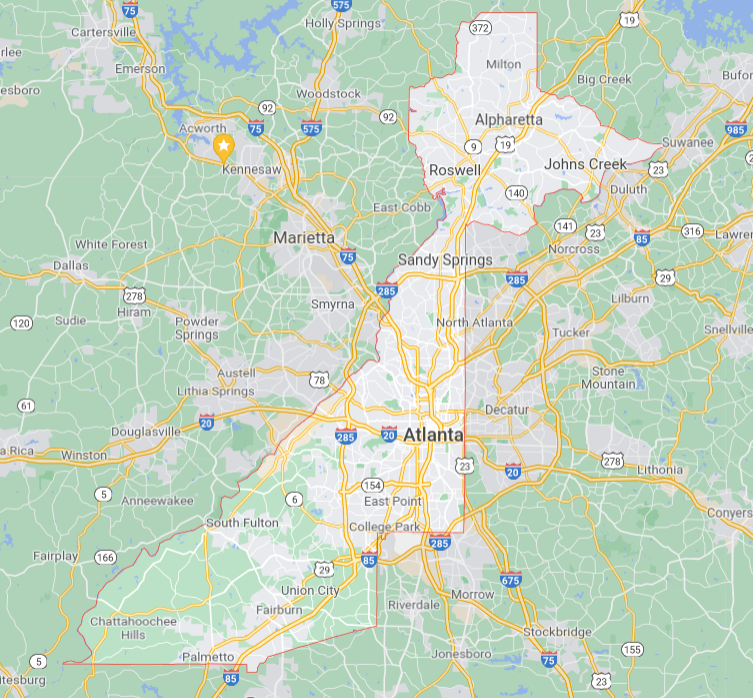

In [166]:
#Picture of fulton county, for reference
from IPython.display import Image
Image(filename='img/fulton.png')

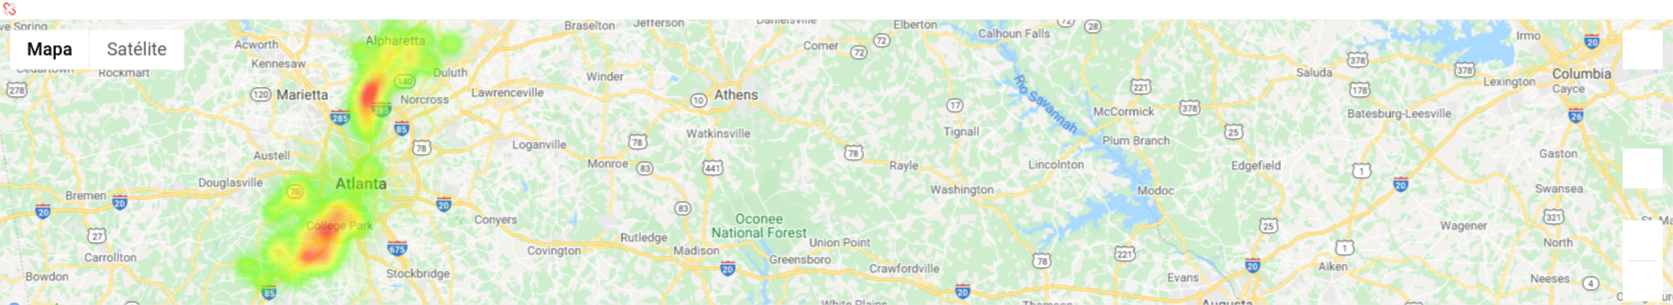

In [165]:
#Below you find a heatmap of the lat/long locations with the higher logistic regression coefficients in red, indicating a higher likelihood of aid received In the next cell a map of the 
# greater atlanta area's richer and poorer neighborhoods. Firstly, our heatmap outlines the fulton county area, as expected
# More importantly, we see from our heatmap that the poorer areas are more likely to receive aid, as they have the higher coefficients indicated by 
# the more intense red coloring, and that one is less likely to receive aid if they
# are an applicant from the altlanta area, as the city of atlanta has its own ERA program, indicated by the light green shade.
Image(filename='img/heatmap.png')

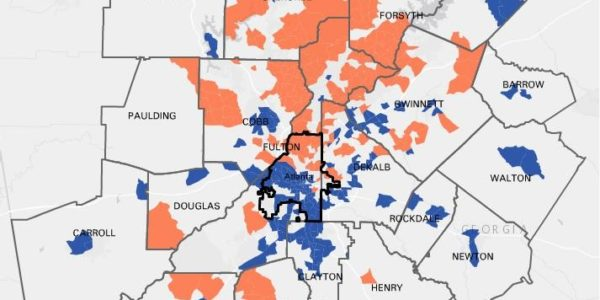

In [124]:
# Image showing righer and poorer neighborhoods, with poorer in blue and richer in red. Notice how the general blue areas in fulton county
# line up with 

Image(filename='img/high_low_income_area.jpg') 
#source: https://www.wabe.org/map-atlantas-highest-and-lowest-income-neighborhoods/

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1868
           1       0.67      0.76      0.71      1015

    accuracy                           0.78      2883
   macro avg       0.76      0.78      0.77      2883
weighted avg       0.79      0.78      0.78      2883

Recall on the training set: 0.86
Accuracy on the training set: 0.83
Recall on the test set: 0.76
Accuracy on the test set: 0.78
[[1481  387]
 [ 245  770]]


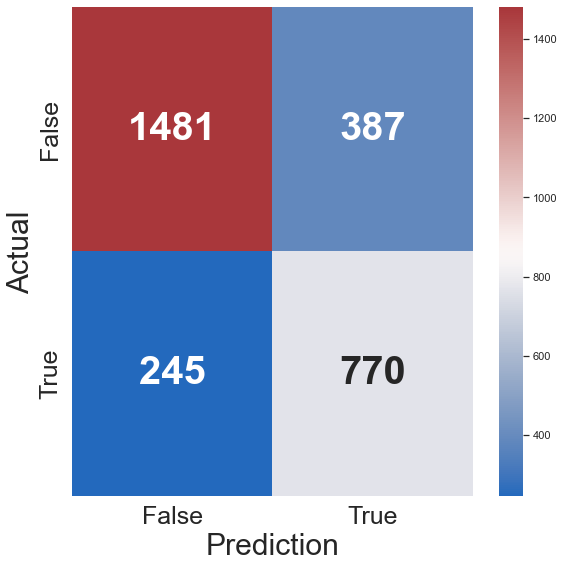

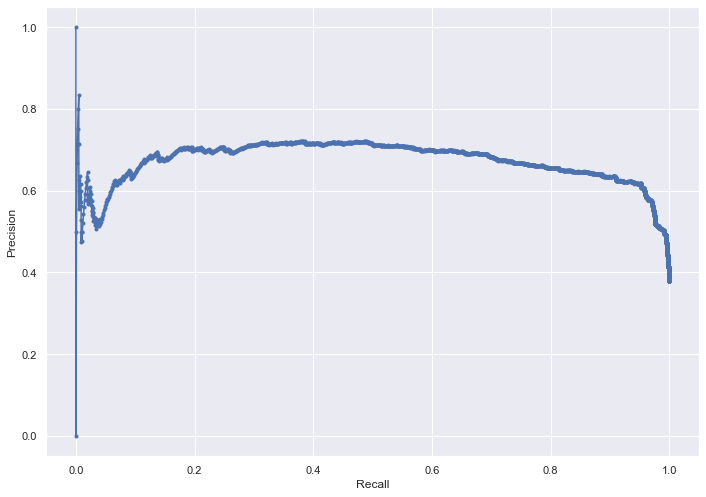

In [154]:
# Summary of the logistic regression model used in this notebook
summary_of_model(grid_clf_log, X_train, X_test, y_train, y_test)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

In [79]:
df = pd.read_csv('data/Neighborly_ERA_Applications.csv')

/home/jcummings/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (34,41,42,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Utility Functions I Use Often, Parameters Needed

In [80]:
def calculate_percent_missing(in_df):
    # function which returns a dataframe indicating what percent of a column is missing
    percent_missing = in_df.isnull().sum() * 100 / len(in_df)
    return pd.DataFrame({'percent_missing': percent_missing})
def summary_of_model(clf, X_train, X_test, y_train, y_test):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
    # This provides a summary of the model, but without the threshold condition.
    # It includes a summary on recall/accuracy on the training and test sets, a visual display of the confusion matrix
    # and a plot of the precision-recall curve for a given classifier.
    pred_test = clf.predict(X_test)
    pred_train = clf.predict(X_train)
    print(classification_report(y_test, pred_test))
    print('Recall on the training set: {:.2f}'.format(recall_score(y_train, pred_train)))
    print('Accuracy on the training set: {:.2f}'.format(accuracy_score(y_train, pred_train)))
    print('Recall on the test set: {:.2f}'.format(recall_score(y_test, pred_test)))
    print('Accuracy on the test set: {:.2f}'.format(accuracy_score(y_test, pred_test)))
    print(confusion_matrix(y_test, pred_test))
    _, ax = plt.subplots(figsize=(9,9))
    ax = sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='vlag', annot_kws={"size": 40, "weight": "bold"})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Actual', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)
    lr_probs = clf.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    plt.figure()
    plt.plot(lr_recall, lr_precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [81]:
TEST_FRACTION = .25 #percentage of the test size
CV = 9 #cross validations to do in grid search
OPT_ON = 'f1' #what to optimize in gridsearches
N_JOBS = 7 #number of cores
RAND_STATE = 0 #will be doing multiple train-test-splits, and want to keep everything random, but do the same train-test-splits

# Exploratory Data Analysis

## Preliminaries

These data are poorly documented. The goal of this section is to get a rough idea about what the columns represent, how they're represented (types), how much is missing, and remove columns which are obviously not useful.

In [82]:
# I like that all the columns are lower case. Taking a look at columns and types
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row id                                    34963 non-null  int64  
 1   case id                                   34963 non-null  int64  
 2   case status                               34963 non-null  object 
 3   case: date created                        34963 non-null  object 
 4   case: program year                        34963 non-null  int64  
 5   funding total amount                      34963 non-null  float64
 6   borrower 1: age                           22823 non-null  float64
 7   borrower 1: ethnicity                     20273 non-null  object 
 8   borrower 1: gender                        21342 non-null  object 
 9   borrower 1: race                          21072 non-null  object 
 10  borrower_1_relationshiptoheadofhou

In [83]:
# Below we see a lot of missing values.  
calculate_percent_missing(df)

,percent_missing
row id,0.000000
case id,0.000000
case status,0.000000
case: date created,0.000000
case: program year,0.000000
funding total amount,0.000000
borrower 1: age,34.722421
borrower 1: ethnicity,42.015845
borrower 1: gender,38.958327
borrower 1: race,39.730572


In [84]:
# Filtering out columns that are clearly not useful
prelim_useful_cols = ['case status', 'case: date created', 'funding total amount', 'borrower 1: age', 'borrower 1: ethnicity', 'borrower 1: gender', 
                      'borrower 1: race', 'borrower_1_relationshiptoheadofhousehold', 'case: landlord case id', 'household annual income',
                      'household ami ratio', 'household ami ratio rounded', 'household size', 'tenant code', 'total assistance requested', 
                      'total assistance approved', 'score', 'x', 'y', 'applicant home point', 'zip_latitude', 'zip_longitude',
                      'city of atlanta', 'out of county', 'fulton service area', 'ams amount', 'days from creation to submitted', 
                      'submit to disbursement', 'duplicate', 'case status 2']
# Columns not included, and reasoning if relevant:
# Row id, case id, 
# case: program year (redundant with case date)
# household monthly income (have annual income)
# every requested/awarded except the total
# cl/cd lat/long (not documented, don't know what they are)
# applicant home point (redundant with x, y)
# out of county text, fulton service area text (redundant with out of county, fulton service area
# check disbursement date (redundant with days from creation to submitted and submitted to disbursement added to days to creation)
df_prelim = df[prelim_useful_cols]

Notes, comments on preliminary explore. See some code snippets below for some justifications.

* Date created is a string.
    * TODO: Change to Datetime DONE
* The applicant zip code has slightly fewer missing values that the zip lat, zip long, so I'll use those
* Score reflects how 'confident' they are in the geocoding for the lat/long. The 25% quantile is 95 out of 100, so I think I'll drop this column
* x, y is the borrower's lat-long, and there are more missing of those than of the zip_lat, zip_long. Perhaps when imputing I can use the x,y coordinates, and if not available use the zip_lat, zip_long coordinates, and then impute the rest in some way (mean, median, etc)
    * TODO: How to impute the missing x, y DONE, the way specified above
* I'm not sure what cl/cd lat/long are and there are no notes in the data about this. Will drop from analysis.
* Applicant home point is just a re-implementation of x, y
* out of county and out of county text appear to be duplicates. Based on the name fulton service area seems to be answering the question 'does fulton service this area' based on its (mainly) inverse relationship with out of county. 
    * TODO: Find if these are inverse relationships. DONE, concluded they are in data exploration
* ams amount is amount disbursed. 82.5 percent of the values are missing, which could be due to their request not being approved. Counterintuitively, this differs from the total assistance approved for, though statistically they're quite close. I'll be total assistance approved, as explained in data analysis
* duplicate data column:
    * TODO: delete duplicates DONE
* Why is there a case status 2. It looks to be a repeat of case status.
    * TODO: confirm that case status 2 is a repeat of case status. DONE, it is

In [85]:
# I'll only want to take a look at the cases which are paid or denied. 
denied_paid_mask = (df_prelim['case status']=='Denied') | (df_prelim['case status']=='Paid')
df_appcomp = df_prelim[denied_paid_mask]

In [86]:
# The amount approved and the ams amount differ in their values, which is unexpected. Statistically they're relatively close.
df_appcomp[df_appcomp['ams amount']>0].loc[:, ['total assistance approved', 'ams amount']].describe() 

,total assistance approved,ams amount
count,4370.000000,4370.000000
mean,6596.151993,7072.066792
std,4618.877793,4971.201766
min,0.000000,37.590000
25%,3984.980000,4145.762500
50%,5643.615000,5935.830000
75%,7800.000000,8018.502500
max,63000.000000,63000.000000


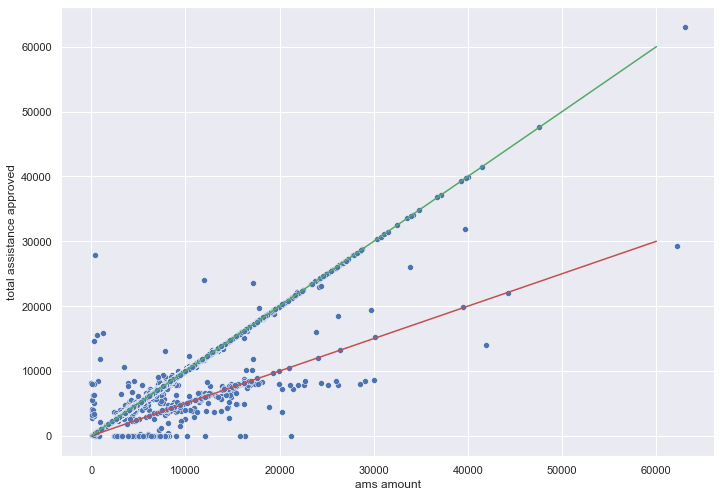

In [161]:
# Investigating the relationship between ams check written and total assistance approved

# Clearly a lot of the values are the same. But a lot are different as well.
# This is very interesting, and could be investigated further. However, without good documentation, I'm going to move forward with 
# assuming that the amount approved for is how much total money the applicant will receive

# Interesting to note is that there are two "lines" in the data. one is the identity y = x, which one would expect what this graph should be
# A hand calculation reveals that the other line has slope .5, which could mean that the ams amount indicates that the applicant
# received two checks totaling the amount of money that they were approved for

#The above does not explain ams amounts that are more than the total assistance approved. I will continue to assume that the amount of 
# assistance approved is how much they will receive, but more information on the data would be useful here.
sns.set_style('whitegrid', {'grid.linestyle':'--'})
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data = df_appcomp, x = 'ams amount', y = 'total assistance approved')

x_plot = np.linspace(0, 60000, 100)
y_plot = .5*x_plot
plt.plot(x_plot, y_plot, color = 'r')
plt.plot(x_plot, x_plot, color='g')

plt.show()

<AxesSubplot:xlabel='funding total amount', ylabel='total assistance approved'>

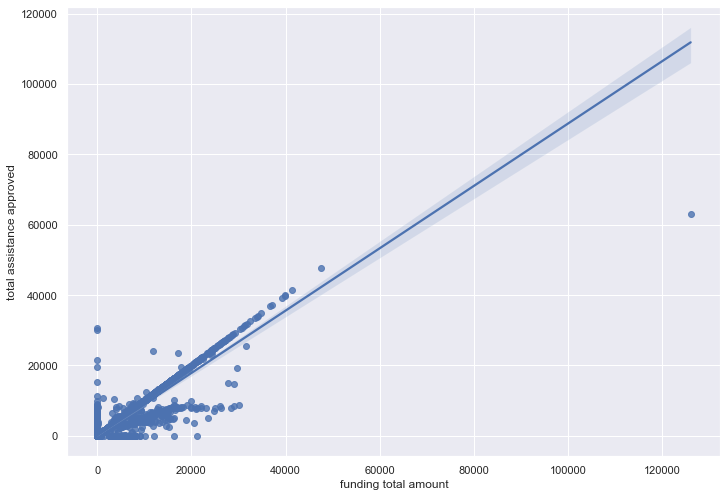

In [88]:
# We see the same behavior as last cell here with "funding total amount" and "total assistance approved"
sns.regplot(data = df_appcomp, x = 'funding total amount', y = 'total assistance approved')

In [89]:
#score's (measuring how accurate their geolocation is) median is 100%, so we'll drop it and assume 100% accuracy.
df_appcomp['score'].describe()

count    14355.000000
mean        94.845448
std         18.216057
min          0.000000
25%         98.325000
50%        100.000000
75%        100.000000
max        100.000000
Name: score, dtype: float64

In [90]:
df_appcomp.drop('score', axis=1, inplace=True)

/home/jcummings/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
# checking to see if the applicant home point is just repeating the x and y lat-long coordinates
# looks to be that this is the case.
df_appcomp.loc[:, ['x','y','applicant home point']]

,x,y,applicant home point
3,-84.264106,33.696984,POINT (33.69698372 -84.2641062)
4,-84.525137,33.589582,POINT (33.58958238 -84.52513744)
6,-84.371456,33.821431,POINT (33.82143067 -84.37145649)
8,-84.535033,33.585610,POINT (33.58561015 -84.53503346)
10,-84.420330,33.598609,POINT (33.59860901 -84.42032996)
...,...,...,...
34954,NaN,NaN,NaN
34956,NaN,NaN,NaN
34958,NaN,NaN,NaN
34959,NaN,NaN,NaN


In [92]:
df_appcomp.drop('applicant home point', axis=1, inplace=True)

/home/jcummings/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
# Taking a look at a summary of only cases which were paid or resolved, since there are a lot of applications under review and I'll probably only
# want to consider resolved cases in my analysis.

# Notes: 
# Minimum borrower age is negative, as well as minimum ami ratio (though the rounded one is not). 
# The median of assistance approved is 0 dollars indicating most applicants do not receive money. 
df_appcomp.describe()

,funding total amount,borrower 1: age,case: landlord case id,household annual income,household ami ratio,household ami ratio rounded,household size,total assistance requested,total assistance approved,x,y,zip_latitude,zip_longitude,ams amount,days from creation to submitted,submit to disbursement
count,17167.000000,15031.000000,7080.000000,15044.000000,14360.000000,14107.000000,15055.000000,1.716700e+04,17167.000000,13865.000000,13865.000000,16606.000000,16606.000000,4371.00000,13065.000000,4370.000000
mean,1842.485945,35.543876,44951.480650,20032.629020,31.069111,45.592968,1.926137,6.614805e+03,1749.738142,-84.399539,33.718698,33.740461,-84.442037,7070.44884,9.150861,73.164302
std,4032.789110,13.778001,7865.651474,21874.861226,31.818416,20.363761,1.301650,1.684185e+04,3766.063807,1.929677,0.780679,0.133708,0.101492,4971.78380,29.994868,52.970165
min,0.000000,-77.000000,30018.000000,0.000000,-94.650000,30.000000,1.000000,-1.154000e+03,0.000000,-119.255492,0.000000,33.212721,-85.012164,0.00000,0.000000,-16.000000
25%,0.000000,28.000000,41208.000000,0.000000,0.000000,30.000000,1.000000,1.994050e+02,0.000000,-84.495651,33.643532,33.641684,-84.528002,4144.00000,0.000000,34.000000
50%,0.000000,34.000000,45884.500000,13951.000000,23.010000,30.000000,1.000000,3.900000e+03,0.000000,-84.449101,33.708076,33.707026,-84.447896,5935.29000,0.000000,54.000000
75%,2217.425000,43.000000,48368.000000,35504.757500,56.267500,60.000000,3.000000,8.070000e+03,1855.125000,-84.379041,33.783028,33.792701,-84.382684,8017.93500,3.000000,109.000000
max,126050.000000,122.000000,75659.000000,445940.000000,517.410000,80.000000,11.000000,1.275116e+06,63000.000000,0.000000,41.557467,34.253365,-83.676030,63000.00000,300.000000,293.000000


<AxesSubplot:xlabel='household ami ratio', ylabel='household ami ratio rounded'>

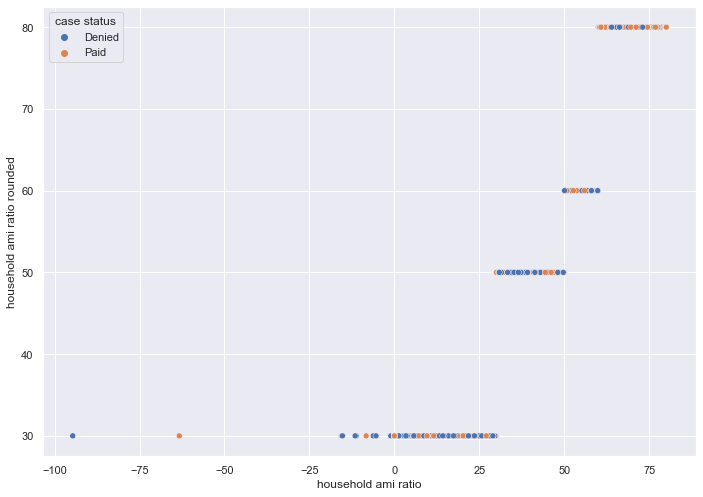

In [94]:
# Looks like they're rounding to the 30, 50, 60, and 80 percentile for ami ratio, but why? I would understand
# if it was rounded to the nearest 10, but 30 50 60 and 80 seems arbitrary.
sns.scatterplot(data = df_appcomp, x = 'household ami ratio', y = 'household ami ratio rounded', hue = 'case status')

<AxesSubplot:xlabel='household ami ratio', ylabel='total assistance approved'>

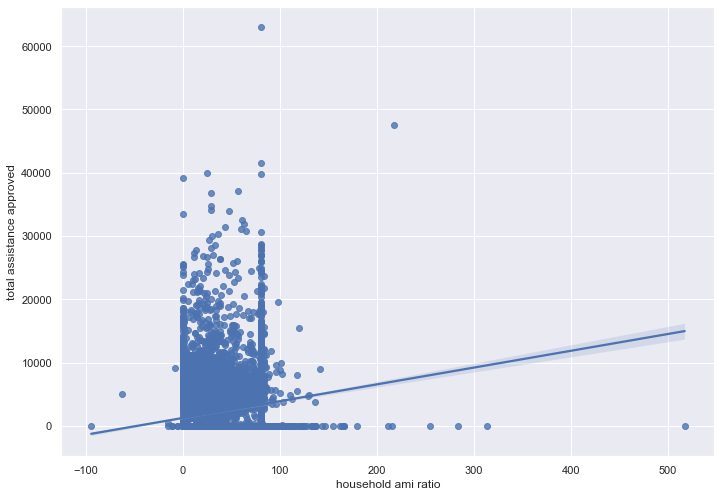

In [95]:
# One would expect to see a relationship between household ami ratio and approval assistance, but there doesn't appear to be one
# that makes sense. A slight positive correlation is the opposite of what intuition expects. More on this will be seen to come.
sns.regplot(data = df_appcomp, x = 'household ami ratio', y = 'total assistance approved')

<AxesSubplot:xlabel='household ami ratio', ylabel='ams amount'>

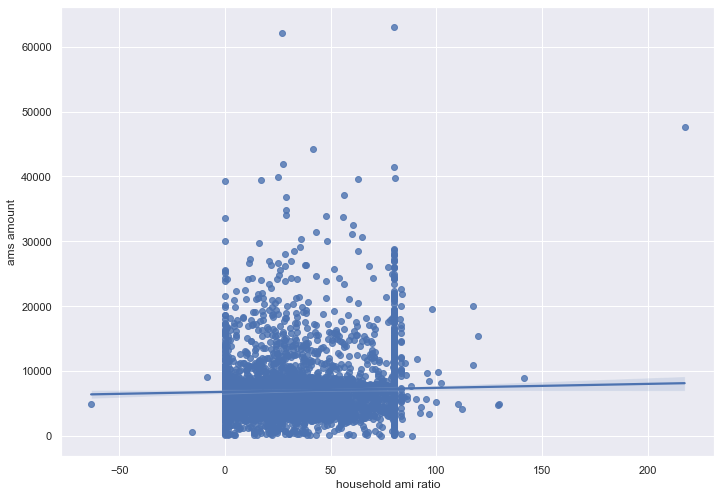

In [96]:
# The same result with the ams amount and the funding total amount is observed in the next two cells.
sns.regplot(data = df_appcomp, x = 'household ami ratio', y = 'ams amount')

<AxesSubplot:xlabel='household ami ratio', ylabel='funding total amount'>

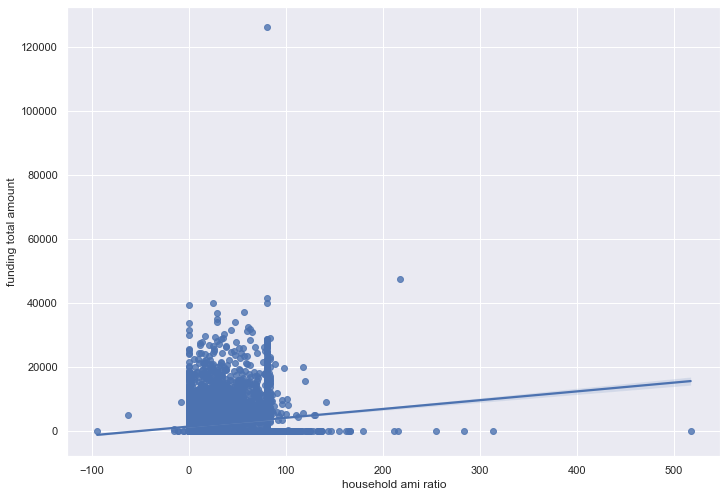

In [97]:
# Again, same result for funding total amount
sns.regplot(data = df_appcomp, x = 'household ami ratio', y = 'funding total amount')

<AxesSubplot:xlabel='household annual income', ylabel='total assistance approved'>

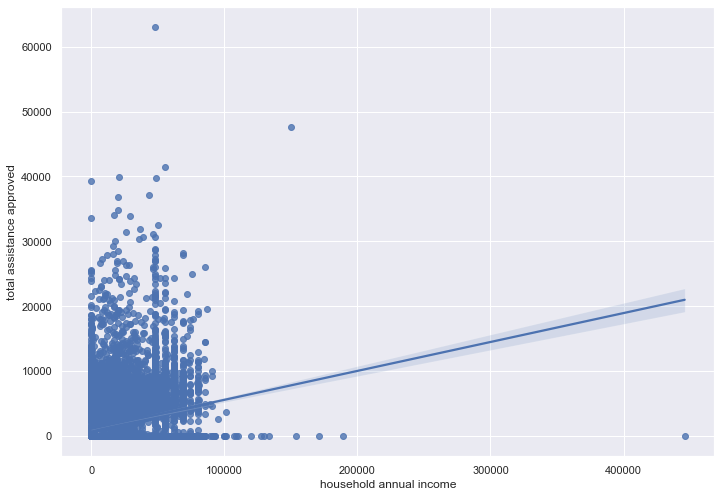

In [98]:
# Just checking amount approved against the household annual income instaed of the ami. Still counterintuitive. Later I'll make a new column of ami ratio / num in household, but it does not remedy this.
sns.regplot(data = df_appcomp, x = 'household annual income', y = 'total assistance approved')

In [99]:
# It will be helpful to have the case status as 0 for denied, 1 for paid. Then mean of that column is a percentage.
# I also want to look at cases where the assistance requested is > 200
approved_mask = (df_appcomp['case status']=='Paid')
denied_mask = (df_appcomp['case status']=='Denied')
df_appcomp.loc[:, 'case status numeric'] = 0.0
df_appcomp.loc[approved_mask,  'case status numeric'] = 1.0

/home/jcummings/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jcummings/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [100]:
# Doing a sanity check, seeing how many requested 0 money. There's 4000!
(df_appcomp['total assistance requested']<=0).sum()

4203

In [101]:
# Maybe the previous were incomplete applications that got denied. If so, that could really skew our results.
# It turns out that no one with total assistance requested <=0
df_low_request = df_appcomp[(df_appcomp['total assistance requested']<=0)]
df_low_request['case status numeric'].mean()

0.0

In [102]:
# Let's throw out those cases of 0 requested assistance and see what percentage of those were approved for funding
df_appcomp = df_appcomp[df_appcomp['total assistance requested']>=100]
df_appcomp['case status numeric'].mean()*100

34.173496211535486

In [103]:
#Filling in some NaNs for non-boolean variables as unknown
df_appcomp.loc[df_appcomp['borrower 1: gender'].isnull(),'borrower 1: gender'] = 'unknown'
df_appcomp.loc[df_appcomp['borrower 1: race'].isnull(),'borrower 1: race'] = 'unknown'
df_appcomp.loc[df_appcomp['borrower_1_relationshiptoheadofhousehold'].isnull(),'borrower_1_relationshiptoheadofhousehold'] = 'unknown'
df_appcomp.loc[df_appcomp['borrower 1: ethnicity'].isnull(),'borrower 1: ethnicity'] = 'unknown'

<AxesSubplot:xlabel='household ami ratio', ylabel='total assistance approved'>

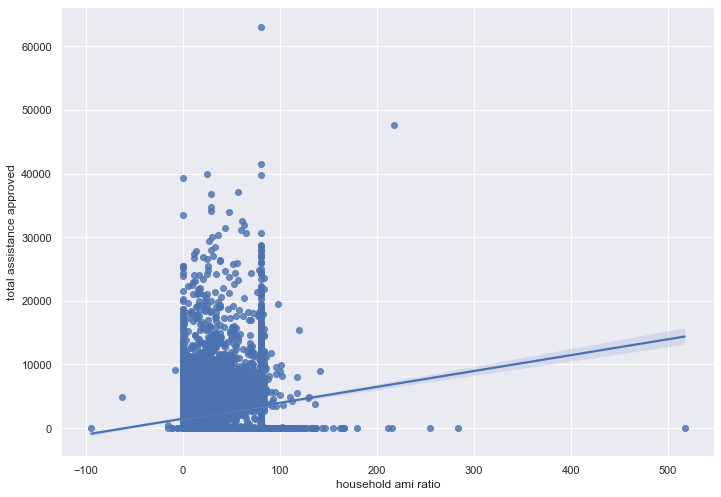

In [104]:
# Let's check again the household ratio now that we removed cases without any assistanace requested. We still have the puzzling positive correlation.
sns.regplot(data = df_appcomp, x = 'household ami ratio', y = 'total assistance approved')

In [105]:
# Creating a column which rounds the ami to the nearest 10 percent
df_appcomp['my household ami rounded'] = df_appcomp['household ami ratio'].round(-1)
df_appcomp['my household ami rounded']
df_appcomp['my household ami rounded'].unique()

array([ 10.,  30.,  20.,  70.,  50.,   0.,  60.,  40., 140.,  nan,  80.,
        90., 110., 100., 120., 160., -60., -90., -20., 150., 130., 180.,
       -10., 220., 280., 210., 250., 170., 520.])

In [106]:
# Going to set ami rounded < 0 to 0
neg_ami_mask =  df_appcomp['my household ami rounded']< 0
df_appcomp.loc[neg_ami_mask, 'my household ami rounded']=0

[(-1.0, 150.0)]

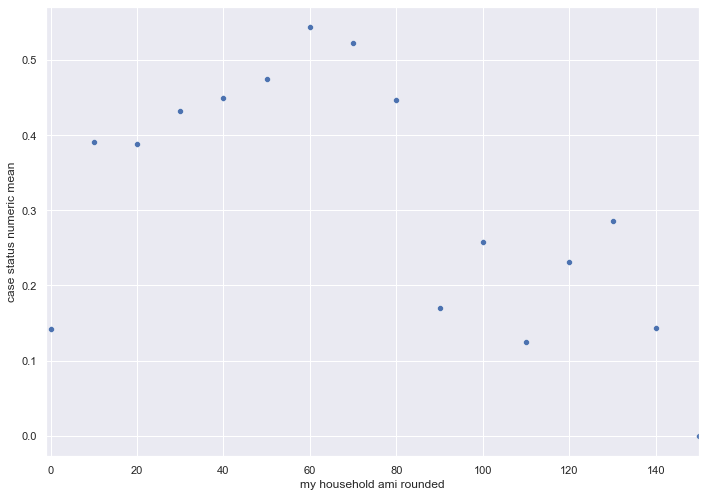

In [107]:
# Trying a slightly different approach here. Grouping by my rounded ami. 
# It appears to be that one is more likely to be approved 
def averager(x):
    names = {
        'case status numeric mean': x['case status numeric'].mean()
    }
    return pd.Series(names, index=['case status numeric mean'])

grp = df_appcomp.groupby(['my household ami rounded']).apply(averager)
grp.reset_index(inplace=True)
sns.scatterplot(data = grp, x='my household ami rounded', y='case status numeric mean').set(xlim=(-1, 150))

[(-1.0, 10.0)]

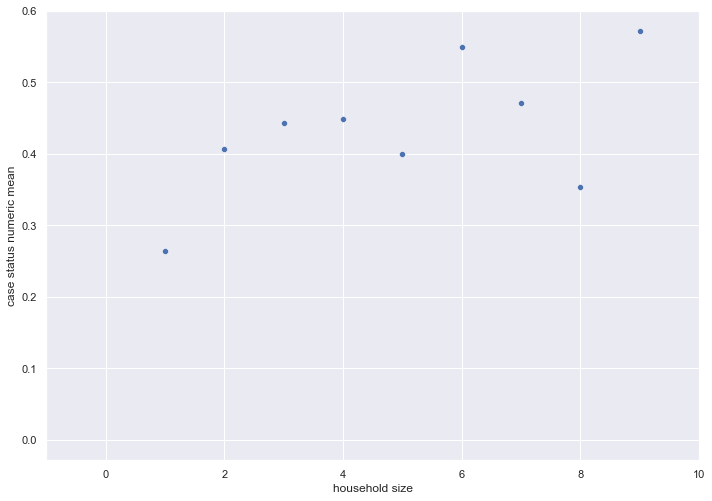

In [108]:
grp2 = df_appcomp.groupby(['household size']).apply(averager)
sns.scatterplot(data = grp2, x='household size', y='case status numeric mean').set(xlim=(-1, 10))

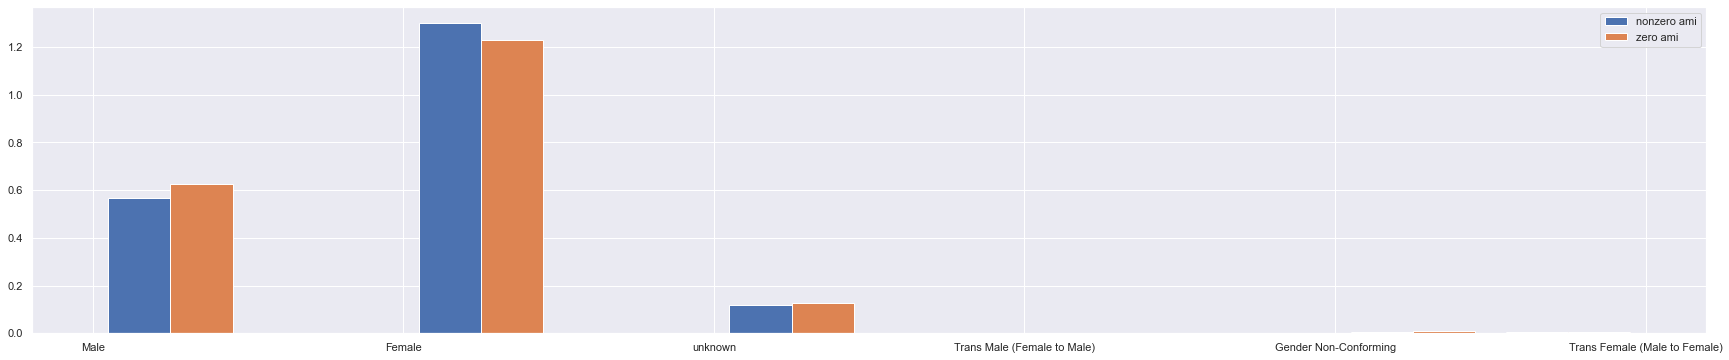

In [109]:
# I was thinking perhaps the zero ami category had more unkowns in gender, race, relationship to head of household, and ethnicity,
# since perhaps a zero ami could perhaps indicate an incomplete application, but it appears not to be the case based on a comparison
# with the percentage of unkowns of these categories in the nonzero ami category
from matplotlib.pyplot import figure
figure(figsize = (30,6))
df_nonzero_ami = df_appcomp[df_appcomp['my household ami rounded'] > 0]
df_zeroami = df_appcomp[df_appcomp['my household ami rounded'] <= 0]
gender_nonzeroami = df_nonzero_ami['borrower 1: gender'].values
gender_zeroami = df_zeroami['borrower 1: gender'].values
#sns.set(rc={'figure.figsize':(30,8.27)})
plt.hist([gender_nonzeroami, gender_zeroami], density=True)
plt.legend(['nonzero ami', 'zero ami'])

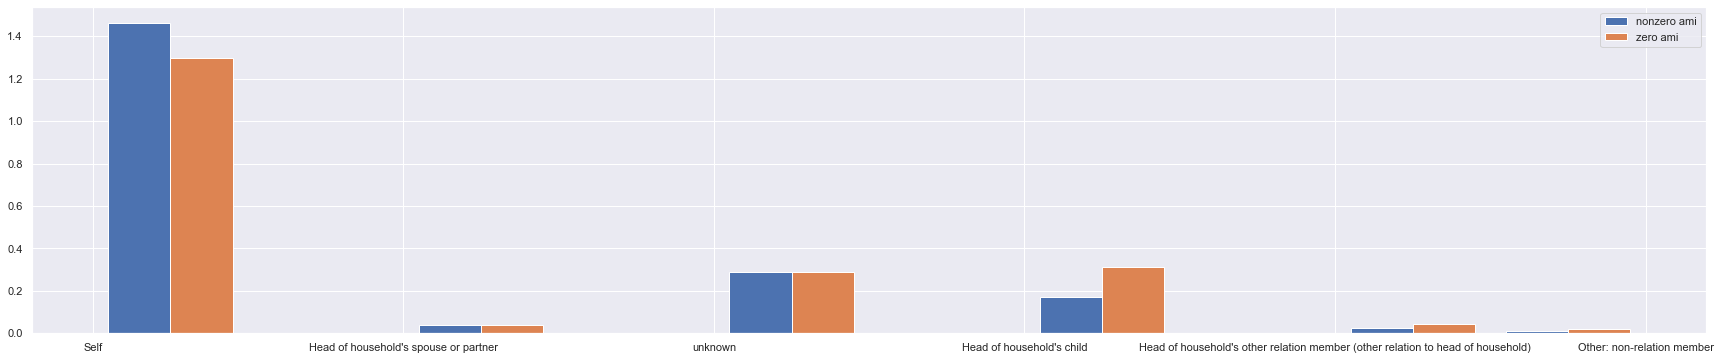

In [110]:
# I was thinking perhaps the zero ami category had more unkowns, since perhaps a zero ami indicates an incomplete application, but it appears not to be the case.
figure(figsize = (30,6))
hh_nonzeroami = df_nonzero_ami['borrower_1_relationshiptoheadofhousehold'].values
hh_zeroami = df_zeroami['borrower_1_relationshiptoheadofhousehold'].values
#sns.set(rc={'figure.figsize':(30,8.27)})
plt.hist([hh_nonzeroami, hh_zeroami], density=True)
plt.legend(['nonzero ami', 'zero ami'])

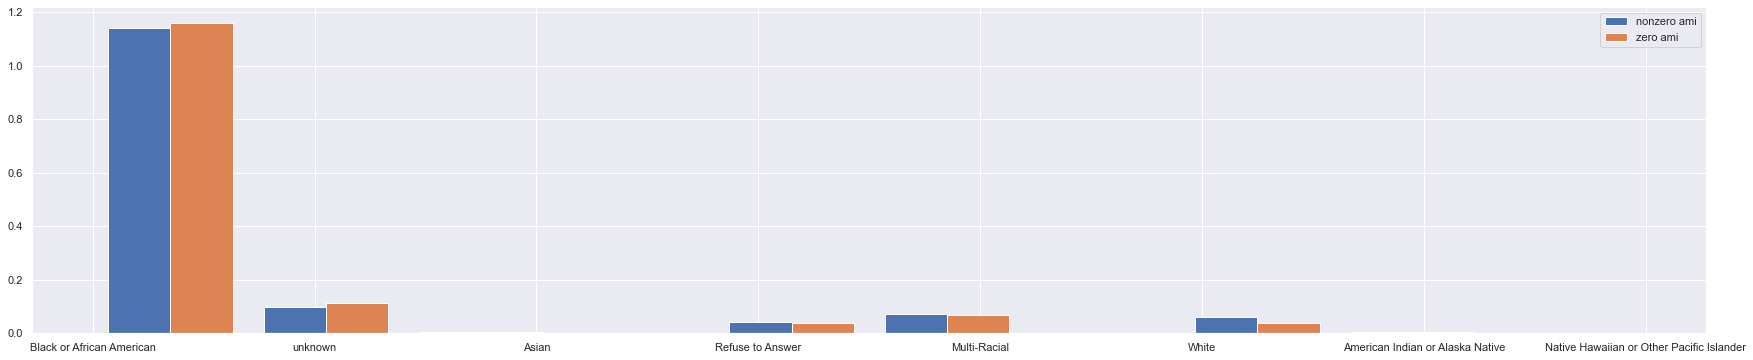

In [111]:
# I was thinking perhaps the zero ami category had more unkowns, since perhaps a zero ami indicates an incomplete application, but it appears not to be the case.
figure(figsize = (30,6))
race_nonzeroami = df_nonzero_ami['borrower 1: race'].values
race_zeroami = df_zeroami['borrower 1: race'].values
#sns.set(rc={'figure.figsize':(30,8.27)})
plt.hist([race_nonzeroami, race_zeroami], density=True)
plt.legend(['nonzero ami', 'zero ami'])

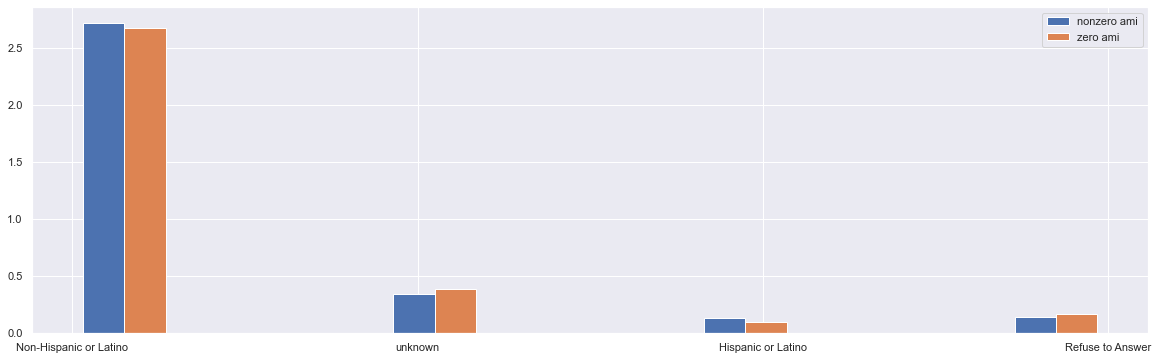

In [112]:
# I was thinking perhaps the zero ami category had more unkowns, since perhaps a zero ami indicates an incomplete application, but it appears not to be the case.
figure(figsize = (20,6))
ethnicity_nonzeroami = df_nonzero_ami['borrower 1: ethnicity'].values
ethnicity_zeroami = df_zeroami['borrower 1: ethnicity'].values
#sns.set(rc={'figure.figsize':(30,8.27)})
plt.hist([ethnicity_nonzeroami, ethnicity_zeroami], density=True)
plt.legend(['nonzero ami', 'zero ami'])

In [113]:
# Taking a look at the percent missing data in each column
calculate_percent_missing(df_appcomp)

,percent_missing
case status,0.000000
case: date created,0.000000
funding total amount,0.000000
borrower 1: age,0.077316
borrower 1: ethnicity,0.000000
borrower 1: gender,0.000000
borrower 1: race,0.000000
borrower_1_relationshiptoheadofhousehold,0.000000
case: landlord case id,55.744549
household annual income,0.371115


In [114]:
# Perhaps out of county is the inverse of fulton service area. It looks that way
df_appcomp[['out of county', 'fulton service area']] 

,out of county,fulton service area
3,True,False
4,False,True
6,False,False
8,False,True
10,True,False
...,...,...
34954,NaN,NaN
34956,NaN,NaN
34958,NaN,NaN
34959,NaN,NaN


In [115]:
# Let's see exactly how many are 'out of county' and also 'in fulton service area'. Looks like there are none, indicating only one of these columns are needed
df_appcomp[(df_appcomp['fulton service area']==True) & (df_appcomp['out of county']==True)]

,case status,case: date created,funding total amount,borrower 1: age,borrower 1: ethnicity,borrower 1: gender,borrower 1: race,borrower_1_relationshiptoheadofhousehold,case: landlord case id,household annual income,...,city of atlanta,out of county,fulton service area,ams amount,days from creation to submitted,submit to disbursement,duplicate,case status 2,case status numeric,my household ami rounded


In [117]:
# I didn't know what this column it is. Looks like there is only one entry and can be dropped
df_appcomp['tenant code'].unique()

array(['ERAP-FULTONCOUNTYGA'], dtype=object)

In [118]:
df_appcomp.drop('tenant code', axis=1, inplace=True)

In [119]:
# Looks like it takes on average  100 days for someone who will get paid to know that they'll get paid
df_appcomp.groupby('case status').agg('mean')[['days from creation to submitted', 'submit to disbursement']]

,days from creation to submitted,submit to disbursement
case status,,
Denied,7.397081,122.875000
Paid,12.508260,73.099862


In [120]:
# Making names more managable. Probably should have done this sooner!
rename_dictionary = {'case status': 'case status', 'case: date created': 'case created', 'borrower 1: age': 'age',
                     'borrower 1: ethnicity': 'ethnicity', 'borrower 1: gender': 'gender', 'borrower 1: race': 'race', 
                     'borrower_1_relationshiptoheadofhousehold': 'relation to hh', 'case: landlord case id': 'landlord case id', 
                     'household annual income': 'annual income', 'household size': 'household size', 'total assistance requested': 'assistance requested', 
                     'x': 'long', 'y': 'lat', 'zip_latitude': 'zip_lat', 'zip_longitude': 'zip_long', 'city of atlanta': 'in atl', 
                     'out of county': 'out of county', 'fulton service area': 'in fulton service area', 
                     'days from creation to submitted': 'days from creation to submitted', 
                     'submit to disbursement': 'days from submitted to disbursement', 'duplicate': 'duplicate'}
df_appcomp.rename(columns = rename_dictionary, inplace=True)

In [121]:
df_appcomp.head()

,case status,case created,funding total amount,age,ethnicity,gender,race,relation to hh,landlord case id,annual income,...,in atl,out of county,in fulton service area,ams amount,days from creation to submitted,days from submitted to disbursement,duplicate,case status 2,case status numeric,my household ami rounded
3,Denied,03/01/2021,0.0,38.0,Non-Hispanic or Latino,Male,Black or African American,Self,NaN,3796.0,...,NaN,True,False,NaN,0.0,NaN,False,Denied,0.0,10.0
4,Denied,03/01/2021,0.0,60.0,unknown,Male,Black or African American,Head of household's spouse or partner,NaN,8304.0,...,False,False,True,NaN,2.0,NaN,False,Denied,0.0,10.0
6,Denied,03/01/2021,0.0,38.0,Non-Hispanic or Latino,Female,Black or African American,Self,NaN,16800.0,...,True,False,False,NaN,NaN,NaN,False,Denied,0.0,30.0
8,Denied,03/01/2021,0.0,26.0,unknown,unknown,unknown,unknown,48138.0,13656.0,...,False,False,True,NaN,0.0,NaN,False,Denied,0.0,20.0
10,Denied,03/01/2021,0.0,50.0,Non-Hispanic or Latino,Male,Black or African American,unknown,NaN,39600.0,...,NaN,True,False,NaN,1.0,NaN,False,Denied,0.0,70.0


In [122]:
## Change to datetime
df_appcomp['case created'] = pd.to_datetime(df_appcomp['case created'])

In [123]:
## Going to drop the landlord case id, not sure exactly what this indicates
df_appcomp.drop('landlord case id', axis = 1, inplace=True)

In [124]:
# Take another look at missing values
calculate_percent_missing(df_appcomp)

,percent_missing
case status,0.000000
case created,0.000000
funding total amount,0.000000
age,0.077316
ethnicity,0.000000
gender,0.000000
race,0.000000
relation to hh,0.000000
annual income,0.371115
household ami ratio,0.363383


In [125]:
# Checking to see if case status 2 is a duplicate of case status. 
# It appears that the only ones that are different than case status one have the marking of "duplicate 2"
status_mask = df_appcomp['case status'] != df_appcomp['case status 2']
df_appcomp[status_mask]

,case status,case created,funding total amount,age,ethnicity,gender,race,relation to hh,annual income,household ami ratio,...,in atl,out of county,in fulton service area,ams amount,days from creation to submitted,days from submitted to disbursement,duplicate,case status 2,case status numeric,my household ami rounded
828,Denied,2021-03-01,0.00,33.0,unknown,Female,Refuse to Answer,unknown,50325.22,72.94,...,False,False,True,NaN,152.0,NaN,True,Duplicate 2,0.0,70.0
2028,Denied,2021-03-02,0.00,25.0,Non-Hispanic or Latino,Male,Black or African American,Self,214.00,0.35,...,False,False,True,NaN,164.0,NaN,True,Duplicate 2,0.0,0.0
4772,Paid,2021-03-02,11808.69,42.0,Non-Hispanic or Latino,Male,Black or African American,unknown,84642.00,90.89,...,False,False,True,11808.69,202.0,35.0,True,Duplicate 2,1.0,90.0
4851,Paid,2021-03-01,3452.78,60.0,Non-Hispanic or Latino,Female,Black or African American,Self,12324.00,21.27,...,False,False,True,3452.78,231.0,28.0,True,Duplicate 2,1.0,20.0
5187,Paid,2021-03-03,9278.30,41.0,Non-Hispanic or Latino,Female,Black or African American,Self,43680.00,72.35,...,False,False,True,9278.30,183.0,55.0,True,Duplicate 2,1.0,70.0
7642,Paid,2021-03-01,3817.58,31.0,Non-Hispanic or Latino,Female,Black or African American,unknown,8160.90,10.96,...,False,False,True,4020.16,154.0,22.0,True,Duplicate 2,1.0,10.0
13083,Paid,2021-03-05,8202.85,29.0,Non-Hispanic or Latino,Female,Black or African American,Self,48300.00,80.00,...,False,False,True,8202.85,250.0,40.0,True,Duplicate 2,1.0,80.0
16144,Paid,2021-03-08,12370.62,44.0,Non-Hispanic or Latino,Female,White,Self,27560.00,41.64,...,False,False,True,6358.73,150.0,34.0,True,Duplicate 2,1.0,40.0
16749,Paid,2021-03-08,7074.25,48.0,Non-Hispanic or Latino,Male,Black or African American,Self,62100.00,80.00,...,False,False,True,7074.25,189.0,49.0,True,Duplicate 2,1.0,80.0


In [126]:
# Since all of the case status 2 are either the same as case status or a duplicate, and I'm going to drop the duplicates anyways
# I don't have to worry about case status 2 after the next line of dropping the duplicate cases
duplicate_drop_mask = df_appcomp['duplicate']==False
df_appcomp = df_appcomp[duplicate_drop_mask]

In [127]:
df_appcomp.drop('case status 2', axis=1, inplace=True)

In [128]:
df_appcomp.drop('duplicate', axis=1, inplace=True)

In [129]:
# Looks like almost all of the missing entries for the columns are significantly reduced once we remove duplicates
# The ones that are higher I either
# a) do not plan on including in the model for classification, such as lat, long (will use zip lat, zip long), ams amount, days from columns, or
# b) will introduce a column as unkown for, such as out of county and in fulton service area.
calculate_percent_missing(df_appcomp)

,percent_missing
case status,0.000000
case created,0.000000
funding total amount,0.000000
age,0.077369
ethnicity,0.000000
gender,0.000000
race,0.000000
relation to hh,0.000000
annual income,0.371373
household ami ratio,0.363636


In [130]:
# I'm going to do a reality check on the numerical variables making a pivot table of the numerical variables
# Again we see that the income, ami is lower for those who were rejected
pd.pivot_table(df_appcomp, index=['case status numeric'],  values = df_appcomp.columns, aggfunc = np.nanmean)

,age,ams amount,annual income,assistance requested,days from creation to submitted,days from submitted to disbursement,funding total amount,household ami ratio,household ami ratio rounded,household size,lat,long,my household ami rounded,total assistance approved,zip_lat,zip_long
case status numeric,,,,,,,,,,,,,,,,
0.0,34.503999,7093.585000,18409.029269,8473.923605,7.359812,122.875000,23.032215,27.883951,43.605769,1.806634,33.729027,-84.424285,27.746114,85.815963,33.739218,-84.434983
1.0,37.685022,7066.173497,29840.412553,9357.280927,12.220082,73.157048,7097.552393,42.868988,52.487850,2.220474,33.739175,-84.455292,42.783858,6617.016494,33.749054,-84.455030


In [131]:
# There are a lot of latitude and logitude data missing, but not a lot of zip_lat or zip_long 
# data missing. I'll drop the missing values, then create a column that is a string of their coordinate pairs
# Then I can one-hot encode on this column (after making sure there are not too many unique values)
# Another option could be to KMeans cluster on this, or grid the the county and assign each case to a grid cell
df_appcomp.dropna(subset=['zip_lat', 'zip_long'], inplace=True)

In [132]:
# First I'm going to overwrite the zip_lat, zip_long with the lat and long, if that information is given
lat_long_given = df_appcomp['lat'].notnull()
df_appcomp.loc[lat_long_given, 'zip_lat'] = df_appcomp.loc[lat_long_given, 'lat']
df_appcomp.loc[lat_long_given, 'zip_long'] = df_appcomp.loc[lat_long_given, 'long']

In [133]:
def to_string_round(row):
    row['zip_lat_str']  = "{:.2f}".format(round(row['zip_lat'],2))
    row['zip_long_str'] = "{:.2f}".format(round(row['zip_long'],2))
    row['zip_loc'] = row['zip_lat_str'] + ', ' + row['zip_long_str']
    return row

df_appcomp = df_appcomp.apply(to_string_round, axis=1)

In [134]:
len(df_appcomp['zip_loc'].unique())

1035

In [135]:
df_appcomp['zip_loc']

3        33.70, -84.26
4        33.59, -84.53
6        33.82, -84.37
8        33.59, -84.54
10       33.60, -84.42
             ...      
34954    33.71, -84.54
34956    33.63, -84.53
34958    33.98, -84.33
34959    33.98, -84.33
34962    33.64, -84.46
Name: zip_loc, Length: 12589, dtype: object

In [136]:
# All location except zip_loc are now unnecessary
df_appcomp.drop(['lat', 'long', 'zip_lat_str', 'zip_long_str', 'zip_lat', 'zip_long'], axis=1, inplace=True)

In [137]:
# Introducing an "unkown" for in atl, out of county instead of NaN, then seeing how many NaNs we have leftover
df_appcomp.loc[df_appcomp['in atl'].isnull(),'in atl'] = 'unkown'
df_appcomp.loc[df_appcomp['out of county'].isnull(),'out of county'] = 'unkown'
columns_to_use_numeric = ['case status numeric', 'age',  'household size', 'assistance requested', 'my household ami rounded']
columns_to_use_cat = ['ethnicity', 'gender', 'race', 'relation to hh', 'out of county', 'zip_loc']
columns_to_use = columns_to_use_numeric + columns_to_use_cat
calculate_percent_missing(df_appcomp[columns_to_use])

,percent_missing
case status numeric,0.000000
age,0.071491
household size,0.285964
assistance requested,0.000000
my household ami rounded,0.365398
ethnicity,0.000000
gender,0.000000
race,0.000000
relation to hh,0.000000
out of county,0.000000


In [138]:

df_nonull = df_appcomp.dropna(subset=columns_to_use)
df_nonull = df_nonull[columns_to_use]

In [139]:
calculate_percent_missing(df_nonull)

,percent_missing
case status numeric,0.0
age,0.0
household size,0.0
assistance requested,0.0
my household ami rounded,0.0
ethnicity,0.0
gender,0.0
race,0.0
relation to hh,0.0
out of county,0.0


In [140]:
pd.pivot_table(df_nonull, index=['case status numeric'],  values = df_nonull.columns, aggfunc = np.mean)

,age,assistance requested,household size,my household ami rounded
case status numeric,,,,
0.0,34.393969,8506.369061,1.810190,28.143239
1.0,37.622510,9367.333374,2.218851,42.973599


In [141]:
# Looks like we at about 11500 entries entries after requiring a minimum age (which was -51 for some reason?)
df_nonull = df_nonull[df_nonull['age']>18]
df_nonull.describe()

,case status numeric,age,household size,assistance requested,my household ami rounded
count,11532.00000,11532.000000,11532.000000,1.153200e+04,11532.000000
mean,0.36221,37.749566,1.931755,8.899115e+03,34.043531
std,0.48066,11.469085,1.308839,1.960800e+04,31.734675
min,0.00000,19.000000,1.000000,1.000000e+02,0.000000
25%,0.00000,29.000000,1.000000,3.225840e+03,0.000000
50%,0.00000,35.000000,1.000000,5.500000e+03,30.000000
75%,1.00000,44.000000,3.000000,1.075330e+04,60.000000
max,1.00000,122.000000,11.000000,1.275116e+06,280.000000


In [142]:
from random import randrange
from sklearn.model_selection import train_test_split

In [143]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11532 entries, 3 to 34962
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case status numeric       11532 non-null  float64
 1   age                       11532 non-null  float64
 2   household size            11532 non-null  float64
 3   assistance requested      11532 non-null  float64
 4   my household ami rounded  11532 non-null  float64
 5   ethnicity                 11532 non-null  object 
 6   gender                    11532 non-null  object 
 7   race                      11532 non-null  object 
 8   relation to hh            11532 non-null  object 
 9   out of county             11532 non-null  object 
 10  zip_loc                   11532 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


In [144]:
target = 'case status numeric'
columns_to_use_numeric.remove('case status numeric')
num = columns_to_use_numeric

In [145]:
cat = columns_to_use_cat
cat

['ethnicity', 'gender', 'race', 'relation to hh', 'out of county', 'zip_loc']

In [146]:
# Scaling numeric variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaling the parameters
ss = StandardScaler()
cols_to_scale = num # cols not included: 'age', 'pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction',  'bloodpressure','skinthickness'
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_scaled = pd.DataFrame(ss.fit_transform(df_nonull[cols_to_scale]), index=df_nonull.index, columns=cols_to_scale)
df_scaled[target] = df_nonull[target]
pd.pivot_table(df_scaled, index=['case status numeric'],  values = df_scaled.columns, aggfunc = np.mean)

,age,assistance requested,household size,my household ami rounded
case status numeric,,,,
0.0,-0.039490,-0.014391,-0.115422,-0.162427
1.0,0.069536,0.025341,0.203238,0.286007


In [147]:
# Removing the first one-hot encode to prevent perfect collinearity
df_cat = df_nonull[cat]
df_cat_encoded = pd.get_dummies(df_cat, drop_first = True)
df_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11532 entries, 3 to 34962
Columns: 1031 entries, ethnicity_Non-Hispanic or Latino to zip_loc_34.18, -84.27
dtypes: uint8(1031)
memory usage: 11.4 MB


In [148]:
df_rejoined = pd.concat([df_scaled, df_cat_encoded], axis=1)
y = df_rejoined.pop('case status numeric')
df_rejoined.info()
y=y.astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11532 entries, 3 to 34962
Columns: 1035 entries, age to zip_loc_34.18, -84.27
dtypes: float64(4), uint8(1031)
memory usage: 11.8 MB


In [149]:
y.mean()

0.36220950398890045

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df_rejoined, y, test_size=TEST_FRACTION, random_state = RAND_STATE)

In [151]:
from sklearn.linear_model import LogisticRegression
grid_values_log = {'penalty': ['l1','l2'], 'C': np.logspace(-3, 4, 100), 'solver': ['liblinear']}
clf_log = LogisticRegression(random_state = RAND_STATE)
grid_clf_log = GridSearchCV(clf_log, param_grid=grid_values_log, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_log.fit(X_train, y_train)

Fitting 9 folds for each of 200 candidates, totalling 1800 fits


GridSearchCV(cv=9, estimator=LogisticRegression(random_state=0), n_jobs=7,
             param_grid={'C': array([1.00000000e-03, 1.17681195e-03, 1.38488637e-03, 1.62975083e-03,
       1.91791026e-03, 2.25701972e-03, 2.65608778e-03, 3.12571585e-03,
       3.67837977e-03, 4.32876128e-03, 5.09413801e-03, 5.99484250e-03,
       7.05480231e-03, 8.30217568e-03, 9.77009957e-03, 1.14975700e-02,
       1.35304777e-02,...
       4.53487851e+02, 5.33669923e+02, 6.28029144e+02, 7.39072203e+02,
       8.69749003e+02, 1.02353102e+03, 1.20450354e+03, 1.41747416e+03,
       1.66810054e+03, 1.96304065e+03, 2.31012970e+03, 2.71858824e+03,
       3.19926714e+03, 3.76493581e+03, 4.43062146e+03, 5.21400829e+03,
       6.13590727e+03, 7.22080902e+03, 8.49753436e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=2)

In [153]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_log.best_params_, grid_clf_log.best_score_))

Best Params: {'C': 4430.621457583878, 'penalty': 'l2', 'solver': 'liblinear'}, 
 Best score: 0.7330456485873277


              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1868
           1       0.67      0.76      0.71      1015

    accuracy                           0.78      2883
   macro avg       0.76      0.78      0.77      2883
weighted avg       0.79      0.78      0.78      2883

Recall on the training set: 0.86
Accuracy on the training set: 0.83
Recall on the test set: 0.76
Accuracy on the test set: 0.78
[[1481  387]
 [ 245  770]]


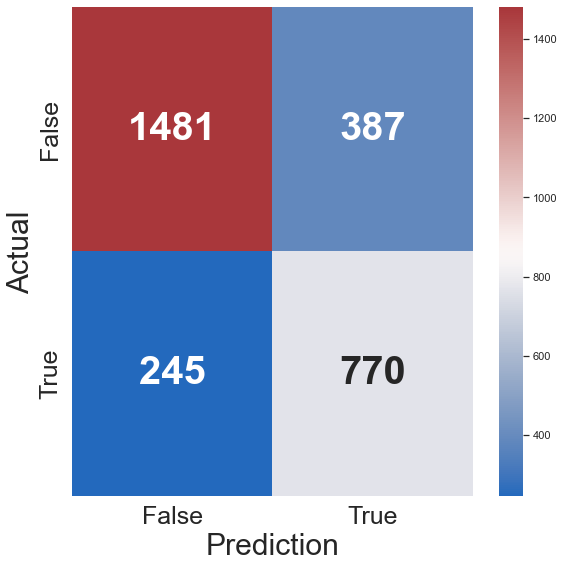

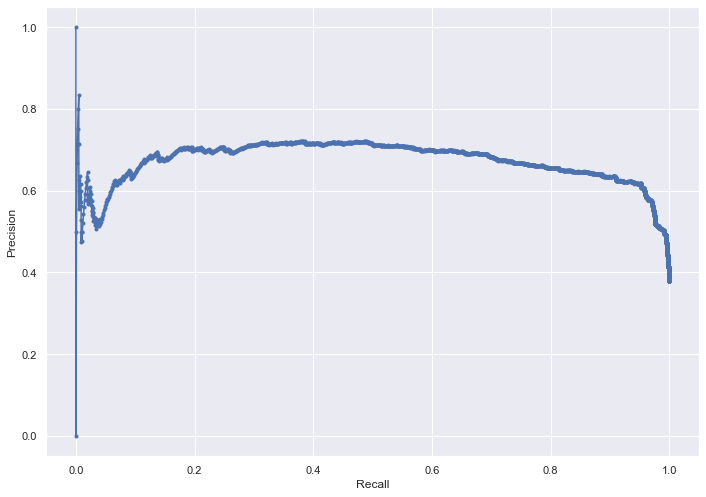

In [154]:
summary_of_model(grid_clf_log, X_train, X_test, y_train, y_test)

In [81]:
model = LogisticRegression(C= grid_clf_log.best_params_['C'], penalty=grid_clf_log.best_params_['penalty'], solver=grid_clf_log.best_params_['solver'])
model.fit(X_train, y_train)

LogisticRegression(C=0.15556761439304723, solver='liblinear')

In [82]:
# I notice that a lot of the larger coefficients are from the location data. I want to create a heatmap
# the visually shows the location of the larger coefficients. I'll do that below.

model.coef_[0:20]

In [84]:
import re
# lets get all the zip_loc entries in the coefficients. they're currently stored as a string with 
# zip_loc in front of the numbers in a list with other parameters, so we'll
# step 1) create an array with all of the coefficient names (including not locations), 
# step 2) then extract the values from that list with zip codes
# step 3)then change it to a format [lat, long, log_reg_coeff

#step 1
coef_list = pd.DataFrame(list(zip(df_rejoined.columns, model.coef_[0])))
coeff_name = [i for i in coef_list.iloc[:,0]] # if re.search(r'zip', i)
coeff_val = [i for i in coef_list.iloc[:,1]]
coeff = list(zip(coeff_name, coeff_val))

#setp 2
coeff_zips = [i for i in coeff if re.search(r'zip', i[0])]
#let's eliminate the zip_loc

'-84.36'

In [97]:
#step 3)
zips = []
for i in coeff_zips:
    zips.append([float(i[0][-13:-8]), float(i[0][-6:]), i[1]])
test = [i[0:2] for i in zips]

In [103]:
# Let's import gmaps 
import os
import gmaps
api_key = os.environ['GOOGLE_API_KEY']
gmaps.configure(api_key=api_key)
locations = np.array([i[0:2] for i in zips])
weights = np.array([i[2] for i in zips])
weights = weights - min(weights) #make all weights positive

In [115]:
cat_weights = []
MAX_W = max(weights)
def round_weights(x):
    if x>.75*MAX_W:
        return 100
    if x> .5*MAX_W:
        return 50
    else:
        return 0
new_weights = list(map(round_weights, weights))

In [118]:
fig = gmaps.figure()
heatmap = gmaps.heatmap_layer(locations, weights=new_weights, max_intensity = 3*max(new_weights))
fig.add_layer(heatmap)
heatmap.point_radius = 22
#heatmap.gradient = ['white', 'red']
fig

Figure(layout=FigureLayout(height='420px'))

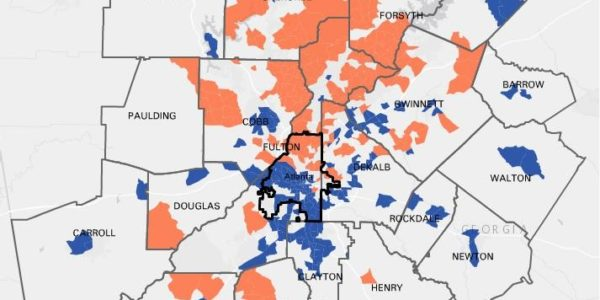

In [124]:
from IPython.display import Image
Image(filename='img/high_low_income_area.jpg') 

In [78]:
# Gradient Boosting

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
grid_values_boost = {'n_estimators': [300, 400, 500],
                     'learning_rate': [1e-3, 2e-3, 3e-3, 4e-3, 5e-3], 
                     'max_depth': [2, 3, 4]}
clf_boost = GradientBoostingClassifier(random_state = RAND_STATE)
grid_clf_boost = GridSearchCV(clf_boost, param_grid=grid_values_boost, cv=CV, scoring=OPT_ON, n_jobs=N_JOBS, verbose=2)
grid_clf_boost.fit(X_train, y_train)

Fitting 9 folds for each of 45 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
print('Best Params: {}, \n Best score: {}'.format(grid_clf_boost.best_params_, grid_clf_boost.best_score_))

In [ ]:
summary_of_model(grid_clf_boost, X_train, X_test, y_train, y_test)

In [ ]:
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.layers.merge import concatenate

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras import Model

In [ ]:
def create_model():
    #Create the base model

    inputs = tf.keras.Input(shape=X_train.shape[1])
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    x1 = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x1)
    merge = concatenate([x1, x])
    x1 = tf.keras.layers.Dense(256, activation='relu')(merge)
    x  = tf.keras.layers.Dense(256, activation='relu')(x1)
    merge = concatenate([x1, x])
    x1 = tf.keras.layers.Dense(256, activation='relu')(merge)
    x  = tf.keras.layers.Dense(256, activation='relu')(x1)
    merge = concatenate([x1, x])
    x1 = tf.keras.layers.Dense(256, activation='relu')(merge)
    x  = tf.keras.layers.Dense(256, activation='relu')(x1)
    merge = concatenate([x1, x])
    x1 = tf.keras.layers.Dense(256, activation='relu')(merge)
    x  = tf.keras.layers.Dense(256, activation='relu')(x1)
    merge = concatenate([x1, x])    
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return Model(inputs, x) #start model at base_model inputs so we don't have to preprocess every time

DENSE = 32
model = create_model()

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 15
history = model.fit(X_train, y_train, epochs = NUM_EPOCHS)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

# Linear Regression

Now that we have a reasonable predictor if someone will receive a loan, let's build a regression model that will predict how much assistance one will received

In [ ]:
df_assistance = df_nonull[df_nonull['total assistance approved']>0]
df_assistance.dropna(subset = ['days from creation to submitted', 'days from submitted to disbursement'], inplace=True)
df_assistance['total wait time'] = df_assistance['days from creation to submitted'] + df_assistance['days from submitted to disbursement']
calculate_percent_missing(df_assistance)

In [ ]:
df_assistance.info()

In [ ]:
df_assistance['ratio_received'] = df_assistance['total assistance approved']/df_assistance['assistance requested']

In [ ]:
target = 'total assistance approved'

In [ ]:
df_assistance.describe()

In [ ]:
# Looks like a lot of people receive more money than requested and the distribution is centered at 1.0
sns.histplot(data=df_assistance, x=target, kde=True)

In [ ]:
sns.regplot(data = df_assistance, x = 'age', y = target)

In [ ]:
sns.regplot(data = df_assistance, x = 'annual income', y = target)

In [ ]:
df_assistance = df_assistance[df_assistance['household size']>0]
df_assistance['income per hh mem'] = df_assistance['annual income']/df_assistance['household size']
sns.regplot(data = df_assistance, x = 'income per hh mem', y = target)

In [ ]:
sns.regplot(data = df_assistance, x = 'assistance requested', y = target)

In [ ]:
df_assistance['ami per num in house'] = df_assistance['household ami ratio']/df_assistance['household size']
df_assistance.dropna(subset=['ami per num in house'], inplace=True)

In [ ]:
sns.regplot(data = df_assistance, x = 'ami per num in house', y = target)

In [ ]:
num = ['age', 'income per hh mem', 'assistance requested']
cat = ['ethnicity', 'gender', 'race', 'relation to hh', 'in atl', 'out of county']
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaling the parameters
ss = StandardScaler()
cols_to_scale = num # cols not included: 'age', 'pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'diabetespedigreefunction',  'bloodpressure','skinthickness'
#pd.pivot_table(df, index=['outcome'],  values = df.columns, aggfunc = np.mean)
df_scaled = pd.DataFrame(ss.fit_transform(df_assistance[cols_to_scale]), index=df_assistance.index, columns=cols_to_scale)
df_scaled[target] = df_assistance[target]

In [ ]:
df_scaled

In [ ]:
df_cat = df_assistance[cat]

In [ ]:
df_cat

In [ ]:
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.info()

In [ ]:
df_cat_encoded = df_cat_encoded.drop(['ethnicity_Non-Hispanic or Latino', 'gender_Male', 'race_Black or African American', 'relation to hh_Self', 'in atl_False', 'out of county_False'], axis=1, inplace=True)

In [ ]:
df_rejoined = df_scaled#pd.concat([df_scaled, df_cat_encoded], axis=1)
y = df_rejoined.pop(target)
calculate_percent_missing(df_rejoined)

In [ ]:
y

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df_rejoined, y, test_size=TEST_FRACTION, random_state = RAND_STATE)

In [ ]:
y_test

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_test

In [ ]:
np.abs(y_pred - y_test).mean()

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)